In [ ]:
#for fetching data set from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

mp_data =pd.read_csv("drive/My Drive/Colab_drive/ML_project_dataset/monkeypox_data.csv")
mp_data.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


**Observation** - Here, we can see that we have 9 features and one target variable "MonkeyPox" (Patient_ID is non relevant).
Target variable can take two values, Positive or Negative.

# Exploratory Data Analysis

In [ ]:
# checking for null values
mp_data.isnull().sum()

Patient_ID                        0
Systemic Illness                  0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Sexually Transmitted Infection    0
MonkeyPox                         0
dtype: int64

In [ ]:
# More Description 
mp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [ ]:
# To know unique values and frequencies of each feature
mp_data.describe().T

,count,unique,top,freq
Patient_ID,25000,25000,P0,1
Systemic Illness,25000,4,Fever,6382
Rectal Pain,25000,2,False,12655
Sore Throat,25000,2,True,12554
Penile Oedema,25000,2,True,12612
Oral Lesions,25000,2,False,12514
Solitary Lesion,25000,2,True,12527
Swollen Tonsils,25000,2,True,12533
HIV Infection,25000,2,True,12584
Sexually Transmitted Infection,25000,2,False,12554


**Observation:**
- Total 25000 rows of data.
- No null or missing values.
- All features are catagorical except Patient_ID which is non relevent.

In [ ]:
# correlation between features
corr = mp_data.corr()
print(corr)

                                Rectal Pain  Sore Throat  Penile Oedema  \
Rectal Pain                        1.000000     0.006214       0.005312   
Sore Throat                        0.006214     1.000000       0.009082   
Penile Oedema                      0.005312     0.009082       1.000000   
Oral Lesions                       0.007747    -0.000795       0.003850   
Solitary Lesion                    0.001147    -0.003609       0.002781   
Swollen Tonsils                    0.002113    -0.002011       0.000536   
HIV Infection                      0.005764     0.000771       0.003620   
Sexually Transmitted Infection     0.000666    -0.001901      -0.005722   

                                Oral Lesions  Solitary Lesion  \
Rectal Pain                         0.007747         0.001147   
Sore Throat                        -0.000795        -0.003609   
Penile Oedema                       0.003850         0.002781   
Oral Lesions                        1.000000        -0.005198   

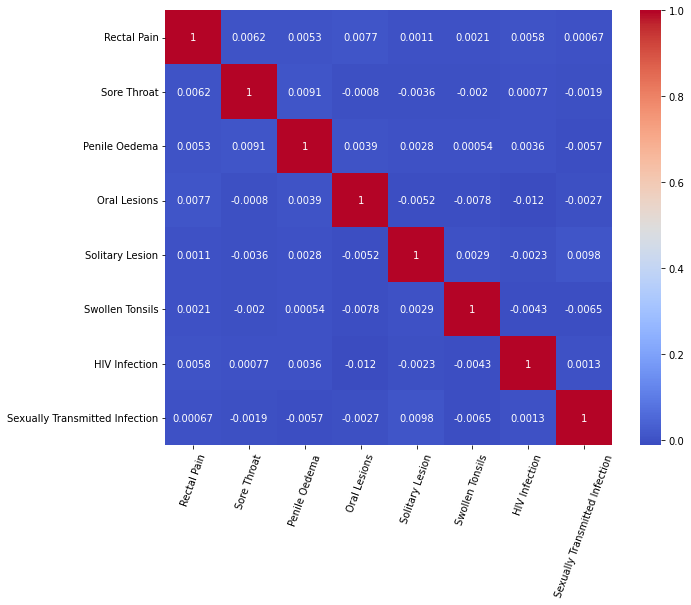

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

## Figure size
plt.figure(figsize = (10,8))

## Heatmap
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.xticks(rotation = 70)
plt.show()

**Observation** - Though weakly correlated, we can see that hiv_infection feature is most correlated to target variavle, then rectal_pain, then STD and so on.

Now plotting some graphs to know about the distribution of features in the dataset.

Positive    15909
Negative     9091
Name: MonkeyPox, dtype: int64

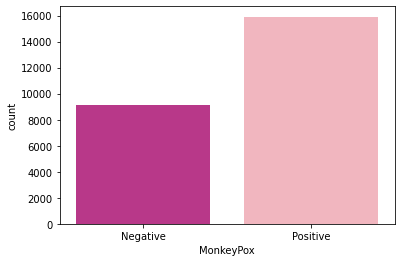

In [ ]:
# target variable plot
warnings.filterwarnings("ignore")
sns.countplot(mp_data["MonkeyPox"], palette = 'RdPu_r')
mp_data.MonkeyPox.value_counts()

**Observation**: Here we can see that the target variable is unbalanced. 15909 Positives and 9091 Negatives.

Now, we will see the distribution of every feature in respect to target variable below:

Systemic Illness       MonkeyPox
Fever                  Negative     1602
                       Positive     4780
Muscle Aches and Pain  Negative     2926
                       Positive     3224
None                   Negative     2892
                       Positive     3324
Swollen Lymph Nodes    Negative     1671
                       Positive     4581
Name: Systemic Illness, dtype: int64

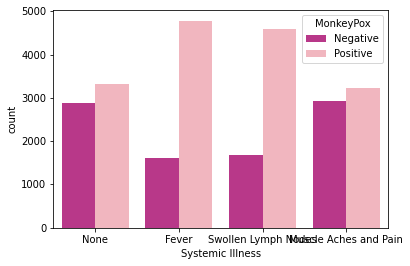

In [ ]:
sns.countplot(x=mp_data['Systemic Illness'], hue=mp_data['MonkeyPox'], palette = 'RdPu_r')

mp_data.groupby(by=['Systemic Illness','MonkeyPox'])['Systemic Illness'].count()

Rectal Pain  MonkeyPox
False        Negative     5448
             Positive     7207
True         Negative     3643
             Positive     8702
Name: Rectal Pain, dtype: int64

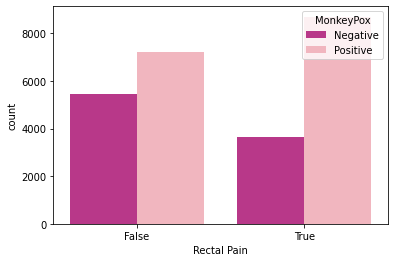

In [ ]:
sns.countplot(x=mp_data['Rectal Pain'], hue=mp_data['MonkeyPox'], palette = 'RdPu_r')
mp_data.groupby(by=['Rectal Pain','MonkeyPox'])['Rectal Pain'].count()

Sore Throat  MonkeyPox
False        Negative     4907
             Positive     7539
True         Negative     4184
             Positive     8370
Name: Sore Throat, dtype: int64

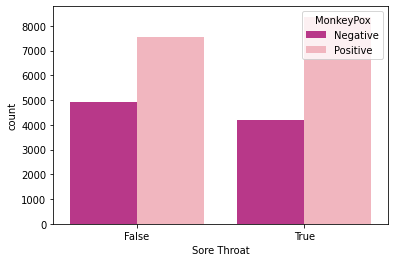

In [ ]:
sns.countplot(x=mp_data['Sore Throat'], hue=mp_data['MonkeyPox'], palette = 'RdPu_r')
mp_data.groupby(by=['Sore Throat','MonkeyPox'])['Sore Throat'].count()

Penile Oedema  MonkeyPox
False          Negative     4877
               Positive     7511
True           Negative     4214
               Positive     8398
Name: Penile Oedema, dtype: int64

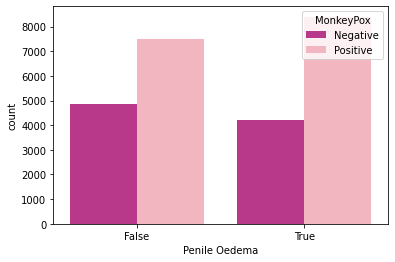

In [ ]:
sns.countplot(x=mp_data['Penile Oedema'], hue=mp_data['MonkeyPox'], palette = 'RdPu_r')
mp_data.groupby(by=['Penile Oedema','MonkeyPox'])['Penile Oedema'].count()

Oral Lesions  MonkeyPox
False         Negative     4863
              Positive     7651
True          Negative     4228
              Positive     8258
Name: Oral Lesions, dtype: int64

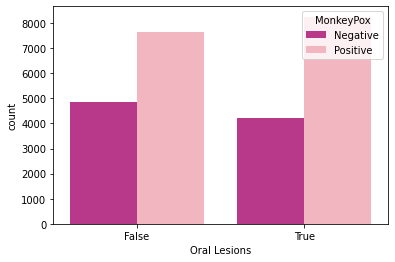

In [ ]:
sns.countplot(x=mp_data['Oral Lesions'], hue=mp_data['MonkeyPox'], palette = 'RdPu_r')
mp_data.groupby(by=['Oral Lesions','MonkeyPox'])['Oral Lesions'].count()

Solitary Lesion  MonkeyPox
False            Negative     4761
                 Positive     7712
True             Negative     4330
                 Positive     8197
Name: Solitary Lesion, dtype: int64

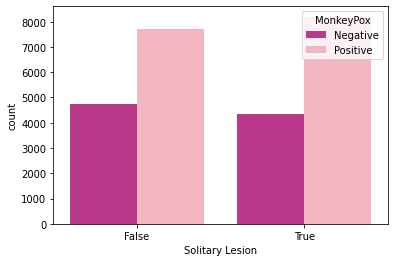

In [ ]:
sns.countplot(x=mp_data['Solitary Lesion'], hue=mp_data['MonkeyPox'], palette = 'RdPu_r')
mp_data.groupby(by=['Solitary Lesion','MonkeyPox'])['Solitary Lesion'].count()

Swollen Tonsils  MonkeyPox
False            Negative     4613
                 Positive     7854
True             Negative     4478
                 Positive     8055
Name: Swollen Tonsils, dtype: int64

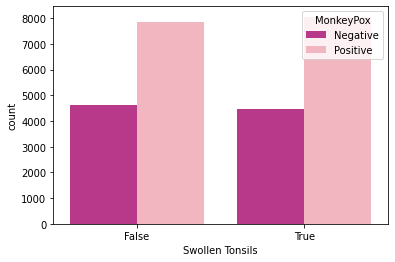

In [ ]:
sns.countplot(x=mp_data['Swollen Tonsils'], hue=mp_data['MonkeyPox'], palette = 'RdPu_r')
mp_data.groupby(by=['Swollen Tonsils','MonkeyPox'])['Swollen Tonsils'].count()

HIV Infection  MonkeyPox
False          Negative     5394
               Positive     7022
True           Negative     3697
               Positive     8887
Name: HIV Infection, dtype: int64

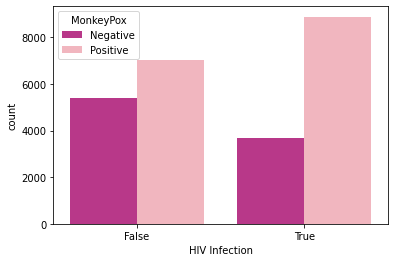

In [ ]:
sns.countplot(x=mp_data['HIV Infection'], hue=mp_data['MonkeyPox'], palette = 'RdPu_r')
mp_data.groupby(by=['HIV Infection','MonkeyPox'])['HIV Infection'].count()

Sexually Transmitted Infection  MonkeyPox
False                           Negative     5307
                                Positive     7247
True                            Negative     3784
                                Positive     8662
Name: Sexually Transmitted Infection, dtype: int64

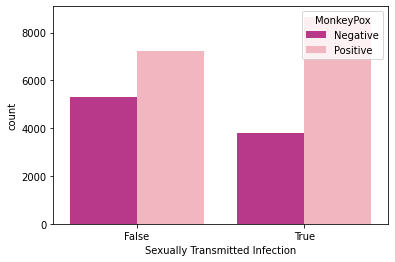

In [ ]:
sns.countplot(x=mp_data['Sexually Transmitted Infection'], hue=mp_data['MonkeyPox'], palette = 'RdPu_r')
mp_data.groupby(by=['Sexually Transmitted Infection','MonkeyPox'])['Sexually Transmitted Infection'].count()

**Observation:** 
- All the features are equally balanced.
- Target column is imbalanced.
- The distribution of data with respect to target is symetrically spead with the features.

# Preprocessing the data.

In [ ]:
# making data numeric
mp_data = mp_data.replace(["Positive", "Negative", True, False], [1,0,1,0])
mp_data.head()


,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,0,1,1,1,0,1,0,0,0
1,P1,Fever,1,0,1,1,0,0,1,0,1
2,P2,Fever,0,1,1,0,0,0,1,0,1
3,P3,None,1,0,0,0,1,1,1,0,1
4,P4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1


In [ ]:
# Removing first and last columns
data_X = mp_data.drop(["MonkeyPox", "Patient_ID"], axis = 1)
data_X.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,None,0,1,1,1,0,1,0,0
1,Fever,1,0,1,1,0,0,1,0
2,Fever,0,1,1,0,0,0,1,0
3,None,1,0,0,0,1,1,1,0
4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0


In [ ]:
data_X.tail()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
24995,None,1,1,0,1,1,0,0,1
24996,Fever,0,1,1,0,1,1,1,1
24997,None,1,1,0,0,1,1,0,0
24998,Swollen Lymph Nodes,0,1,0,1,1,1,0,0
24999,Swollen Lymph Nodes,0,0,1,0,0,1,1,0


In [ ]:
# transforming catagorical feature 'Systemic Illness' 

data_X_final = pd.get_dummies(data_X, drop_first = True)
data_X_final.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Systemic Illness_Muscle Aches and Pain,Systemic Illness_None,Systemic Illness_Swollen Lymph Nodes
0,0,1,1,1,0,1,0,0,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,1,1,0,0,1,0
4,1,1,1,0,0,1,1,0,0,0,1


In [ ]:
# set of target variables
data_y = mp_data["MonkeyPox"]
data_y.head()

0    0
1    1
2    1
3    1
4    1
Name: MonkeyPox, dtype: int64

In [ ]:
# A fucntion for calculation of evaluation criteria

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
def validation(test,pred):
    print('Confusion matrix \n', confusion_matrix(test,pred))
    print('Accuracy: ', accuracy_score(test,pred))
    print('Recall :',recall_score(test,pred))
    print('Precision :', precision_score(test,pred))
    print('F1 score :', f1_score(test,pred))


## 1. Perceptron Classifier:

We will be using Perceptron algorithm of scikit-learn python library. Here, we are using 10-Fold cross validation on entire data which we prepared and then we will check the accuracy of model. After that we will try to tune hyperparameters to see the effects on accuracy.

In [ ]:
#import for perceptron model
from sklearn.linear_model import Perceptron

#import for N-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# import for numpy functions
from numpy import mean
from numpy import std

# defining  Perceptron model, learning rate is 1.0
model = Perceptron(eta0=1.0)

# we are using 10-Fold cross validation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, data_X_final, data_y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f ' % (mean(scores)))

Mean Accuracy: 0.593 


As we can see here Accuracy of Perceptron model comes to be nealy 60%  which is little less. We will try to tune parameters and see how our result gets effected.

In [ ]:
# we will be testing 5 values of learning rate(hyperparameter)

#here we are using GridSearchCV class instead of cross_val_score. So importing
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

results = search.fit(data_X_final, data_y)

means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print("Accuracy : %.3f with: %r" % (mean, param))

print('Mean best Accuracy: %.3f' % (results.best_score_ ))

Accuracy : 0.594 with: {'eta0': 0.0001}
Accuracy : 0.592 with: {'eta0': 0.001}
Accuracy : 0.583 with: {'eta0': 0.01}
Accuracy : 0.590 with: {'eta0': 0.1}
Accuracy : 0.593 with: {'eta0': 1.0}
Mean best Accuracy: 0.594


**Analysis** : We can see that for smallest learning rate 0.001 we have the best score. Hence, large learning rate can cause the model to learn fast, but accuracy is lower. A smaller learning rate can result in a better-performing model but may take a long time to train the model.

Reference : https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/


## 2. SVM Classifier

In [ ]:
#Splitting the data in training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X_final, data_y, test_size = 0.2, random_state = None)
#X_train.head()
#y_train.head()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(20000, 11)
(20000,)
(5000, 11)
(5000,)


,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Systemic Illness_Muscle Aches and Pain,Systemic Illness_None,Systemic Illness_Swollen Lymph Nodes
10953,0,1,0,1,0,1,0,1,0,0,0
16650,1,1,1,0,0,1,1,1,0,0,0
24366,1,1,0,1,1,1,1,1,0,0,0
19566,0,0,0,1,1,1,1,1,1,0,0
13280,0,1,1,0,1,0,0,0,0,1,0


### 1.Linear SVM

In [ ]:
from sklearn.svm import SVC

# first using linear SVM algorithm 
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
validation(y_test, y_pred)

Confusion matrix 
 [[ 644 1132]
 [ 389 2835]]
Accuracy:  0.6958
Recall : 0.8793424317617866
Precision : 0.7146458280816738
F1 score : 0.7884856070087609


### 2. Kernel SVM (Polynomial)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

validation(y_test, y_pred)


Confusion matrix 
 [[ 490 1286]
 [ 258 2966]]
Accuracy:  0.6912
Recall : 0.9199751861042184
Precision : 0.6975540921919097
F1 score : 0.7934724451578383


### 3. Kernel SVM (Sigmoid)

In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
validation(y_test, y_pred)

Confusion matrix 
 [[ 650 1126]
 [1113 2111]]
Accuracy:  0.5522
Recall : 0.6547766749379652
Precision : 0.6521470497374112
F1 score : 0.6534592168394985


### 4. Kernel SVM (Gaussian)

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = "rbf", C = 100) 
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
#y_pred_train = svclassifier.predict(X_train)
validation(y_test, y_pred)
#validation(y_train, y_pred_train)

Confusion matrix 
 [[ 607 1169]
 [ 446 2778]]
Accuracy:  0.677
Recall : 0.8616625310173698
Precision : 0.7038256903977704
F1 score : 0.7747873378887185


**Observation**: 
- 1. Sigmoid kernel is worst performing.
- 2. Linear SVM is performing best till now. Why not other complex ones like polynomial and Gaussian? 

Are they overfitting?
So, let's try to adjust hyperparameters and see.

In [ ]:
# we need GridSearch for this
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a dictionary called param_grid and fill out some parameters for kernels, C is regularization.
param_grid = {'C': [0.01, 1, 10], 'gamma': ['scale'],'kernel': ['rbf', 'poly' ]}

In [ ]:
# Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=  18.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=  18.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=  17.7s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=  17.8s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=  17.8s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=  11.2s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=  11.2s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=  11.4s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=  11.1s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=  11.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=  19.5s
[CV] END .......................C=1, gamma=scale,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 1, 10], 'gamma': ['scale'],
                         'kernel': ['rbf', 'poly']},
             verbose=2)

In [ ]:
# printing the best parameters
print(grid.best_estimator_)

SVC(C=10, kernel='poly')


As we found out that best value for regularization parameter is 10. Let us use that on polynomial kernel model and see.

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='poly', C=10)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

validation(y_test, y_pred)

Confusion matrix 
 [[ 503 1273]
 [ 258 2966]]
Accuracy:  0.6938
Recall : 0.9199751861042184
Precision : 0.6996933238971456
F1 score : 0.7948546161061235


In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = "rbf", C = 10, gamma="scale") 
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
#y_pred_train = svclassifier.predict(X_train)
validation(y_test, y_pred)
#validation(y_train, y_pred_train)

Confusion matrix 
 [[ 591 1185]
 [ 389 2835]]
Accuracy:  0.6852
Recall : 0.8793424317617866
Precision : 0.7052238805970149
F1 score : 0.7827167310877968


**Observation:**
- the optimal value of C has increased the accuracy of Polynomial model and Gaussian model. 

Reference: https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)
validation(y_test, y_pred)

Confusion matrix 
 [[ 735 1041]
 [ 719 2505]]
Accuracy:  0.648
Recall : 0.776985111662531
Precision : 0.7064297800338409
F1 score : 0.7400295420974888


**Observation**: Pretty much as expected accuracy. 

But let's tune our hyperparameter, i.e. find the optimal K value. 

In [ ]:
# running our model for different K values
accuracies = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 y_pred_i = knn.predict(X_test)
 accuracies.append(accuracy_score(y_test,y_pred_i))

print(accuracies)

[0.6154, 0.5578, 0.6354, 0.6196, 0.648, 0.6304, 0.6552, 0.6494, 0.6652, 0.654, 0.6694, 0.6622, 0.6744, 0.6688, 0.6736, 0.6748, 0.6758, 0.6728, 0.6746, 0.6742, 0.6772, 0.6744, 0.6802, 0.6782, 0.6836, 0.6806, 0.6816, 0.6812, 0.684, 0.6834, 0.6818, 0.6836, 0.6862, 0.688, 0.686, 0.682, 0.6844, 0.682, 0.6848]


Text(0, 0.5, 'Accuracies')

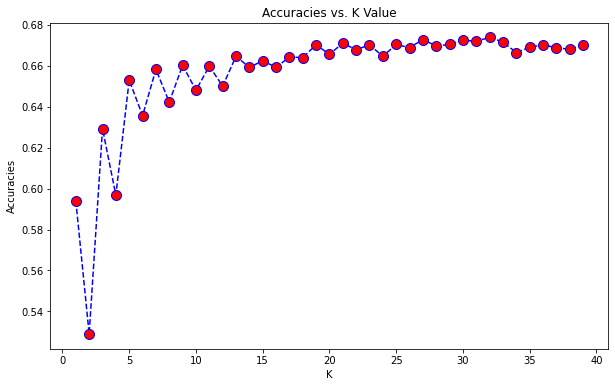

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracies,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracies vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracies')

**Observation:**
- Larger values of K are giving good prediction. 
- A range of K values(after 15) are good choice for our model.
- Optimal value is 33(Accuracy 0.6738)


Reference: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

Let's try normalising the data

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

model_knn= KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train_s,y_train)
y_pred = model_knn.predict(X_test_s)
validation(y_test, y_pred)

Confusion matrix 
 [[ 788 1063]
 [ 665 2484]]
Accuracy:  0.6544
Recall : 0.7888218482057796
Precision : 0.7003101212292078
F1 score : 0.7419354838709677


Observation: Same results because all features are binary.

## Logistic Regression

We can create logistic regression model using sklearn. One example is shown below:

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver= 'liblinear', random_state=0)
model.fit(X_train, y_train)

print('Accuracy on  test data: ', model.score(X_test, y_test))



Accuracy on  test data:  0.6876


for logistic regression in sklearn there exists 5 types of solver namely ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’ and ‘saga’. They have different use for different type of datasets.
There are panalty types and a constant C which decides panalty strength in regularized logistic regression. 

So, now we will check which one is performing well for our case. And we will get to know the optimal hyperparameters.

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# different models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# defining grid search and using 10-Fold cross validation here.
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(data_X_final, data_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.692613 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.690520 (0.007973) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.690520 (0.007973) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690520 (0.007973) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.690533 (0.007958) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.690533 (0.007958) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690533 (0.007958) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.690507 (0.007950) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.690507 (0.007950) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690560 (0.007925) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.690653 (0.008026) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.690653 (0.008026) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690627 (0.008061) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.692200 (0.008087) wi

**Observation**:
As we can see here, for our dataset, significant affect in performance for lower C value. Means for high regularization out model perfroms well.

Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/



##Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
# instantiate the DecisionTreeClassifier model with criterion gini index
#clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
#clf_gini.fit(X, y)

feature_names = X_train.columns

clf_model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)


y_predict = clf_model.predict(X_test)
y_predict_train = clf_model.predict(X_train)

#export the decision rules
tree_rules = export_text(clf_model, feature_names = list(feature_names))
#print the result
print(tree_rules)

validation(y_test,y_predict)


|--- Rectal Pain <= 0.50
|   |--- HIV Infection <= 0.50
|   |   |--- Systemic Illness_None <= 0.50
|   |   |   |--- Systemic Illness_Muscle Aches and Pain <= 0.50
|   |   |   |   |--- Sexually Transmitted Infection <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Sexually Transmitted Infection >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Systemic Illness_Muscle Aches and Pain >  0.50
|   |   |   |   |--- Sexually Transmitted Infection <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Sexually Transmitted Infection >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- Systemic Illness_None >  0.50
|   |   |   |--- Sexually Transmitted Infection <= 0.50
|   |   |   |   |--- Penile Oedema <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Penile Oedema >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Sexually Transmitted Infection >  0.50
|   |   |   |   |--- Oral Lesions <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   

In [ ]:
clf_model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=10, min_samples_leaf= 5)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
y_predict_train = clf_model.predict(X_train)

#export the decision rules
tree_rules = export_text(clf_model, feature_names = list(feature_names))
#print the result
#print(tree_rules)
print("test evaluation ")
validation(y_test,y_predict)
print("train evaluation ")
validation(y_train,y_predict_train)

test evaluation 
Confusion matrix 
 [[ 639 1137]
 [ 471 2753]]
Accuracy:  0.6784
Recall : 0.8539081885856079
Precision : 0.7077120822622108
F1 score : 0.7739668259769468
train evaluation 
Confusion matrix 
 [[ 2915  4400]
 [ 1474 11211]]
Accuracy:  0.7063
Recall : 0.8837997635001971
Precision : 0.7181474601242713
F1 score : 0.7924088210347753


**Observation**: 
- Accuracy of this model is close to 70%, which was expected. 
- Also, the splitting is done on those features which we found to be most relevant in our EDA.

Now, let us see how different hyperparameters(depth and number of leaves) affect the model performance. 
Let's try to tune hyperparameters in order to find optimal hyperparameters.

In [ ]:
# Again we will be using GridSearch for tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': range(1, 5),
    'min_samples_split': range(1, 10),
    'criterion': ["entropy"]
}

dt = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")

# We will be using our complete dataset here

grid_search.fit(data_X_final, data_y)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
grid_search.best_score_

0.6856

**Observation**:
- So we found that max_depth 5, min_sample_leaft 1 and min_sample_split 2 are the best hyperparameters giving best 68.5% accuracy.

Reference : 
- https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees
- https://plainenglish.io/blog/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda

##Neural Networks

In [ ]:
!pip install scikeras
!pip install tensorflow

In [ ]:
#importing useful libraries
import pandas as pd
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

first creating baseline model with single hidden layer with same number of neurons as input variables. This will be the starting point of creating our neural network. Using relu activation here.

In [ ]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(11, input_shape=(11,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
#converting data to numpy array for Keras Classifier
X = data_X_final.to_numpy();
y = data_y.to_numpy();
print(X)

[[0 1 1 ... 0 1 0]
 [1 0 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 1]
 [0 0 1 ... 0 0 1]]


performing 10-Fold stratified cross validation.

In [ ]:
# evaluate model 
estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=500, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline Accuracy and Std. deviation: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline Accuracy and Std. deviation: 69.35% (0.88%)


**Observation**: 
- The performance of this model is pretty good. 


Reference: https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/


Now let's see how many hidden layers and how many activation units per layer are required. These are our hyperparameters. 
We need to find optimal values so that our model can achieve best accuracy.

We will be using Bayesian Optimizer for this.


In [ ]:
#installing important  package
!pip install bayesian-optimization

In [ ]:
# Importing important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [ ]:
# Create function and providing different type of optimizers activation types learning rate etc.
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=11, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X, y, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
# Set paramaters
params_nn ={
    'neurons': (1, 30),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Running Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------
| 1         | 0.5273    | 5.51      | 335.3     | 54.88     | 0.7716    | 9.564     | 1.044     |
| 2         | 0.6646    | 0.2023    | 536.2     | 39.09     | 0.3443    | 29.73     | 1.664     |
| 3         | 0.6787    | 0.7307    | 735.7     | 69.7      | 0.2815    | 14.52     | 0.8286    |
| 4         | 0.5272    | 0.6656    | 920.6     | 83.52     | 0.8422    | 24.64     | 6.937     |
| 5         | 0.691     | 5.195     | 851.0     | 53.71     | 0.03717   | 14.17     | 0.7373    |
| 6         | 0.3636    | 7.355     | 758.2     | 65.22     | 0.2815    | 29.96     | 0.9663    |
| 7         | 0.6364    | 5.539     | 588.0     | 52.4      | 0.7306    | 10.36     | 2.804     |
| 8         | 0.6879    | 2.871     | 957.8     | 93.5      | 0.8157    | 1.988     | 6.604     |
| 9         | 0.6365

In [ ]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

{'activation': 'selu',
 'batch_size': 851.0135336291902,
 'epochs': 53.7054301919375,
 'learning_rate': 0.037173480215022196,
 'neurons': 14.169962651595627,
 'optimizer': 0.7372825972056519}

Let's try with optimal hyperparameters

In [ ]:
# trying with optimal hyperparameters 
def create_optimal():
	# create model
  model = Sequential()
  model.add(Dense(15, input_shape=(11,), activation='selu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_optimal, epochs=54, batch_size=852, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
#print("Smaller: %.2f% (%.2f%)" % (results.mean(), results.std()))
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 69.08% (0.71%)



Reference: https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/